In [1]:
def calculate_ade(ego_points, future_points, start, end):
    """Ego 차량의 좌표와 미래 예측 경로를 사용해 주어진 스텝 수까지 ADE를 계산합니다.
    
    Parameters:
    ego_points (list): Ego 차량의 포인트 리스트
    future_points (list): 예측된 포인트 리스트
    steps (int): 평균을 낼 포인트 수 (스텝 수)

    Returns:
    float: 평균 변위 오차(ADE)
    """
    # 평균을 낼 스텝 수만큼 포인트를 자릅니다.
    ego_points = ego_points[start:end]
    future_points = future_points[start:end]

    # 각 포인트 쌍의 오차 계산
    errors = [
        np.linalg.norm(np.array(ego) - np.array(future))
        for ego, future in zip(ego_points, future_points)
    ]
    
    return np.mean(errors)

def calculate_fde(ego_points, future_points, start, end):
    """Ego 차량의 좌표와 미래 예측 경로를 사용해 주어진 스텝 수까지 ADE를 계산합니다.
    
    Parameters:
    ego_points (list): Ego 차량의 포인트 리스트
    future_points (list): 예측된 포인트 리스트
    steps (int): 평균을 낼 포인트 수 (스텝 수)

    Returns:
    float: 평균 변위 오차(ADE)
    """
    # 평균을 낼 스텝 수만큼 포인트를 자릅니다.
    ego_points = ego_points[start:end]
    future_points = future_points[start:end]

    # 각 포인트 쌍의 오차 계산
    errors = [
        np.linalg.norm(np.array(ego) - np.array(future))
        for ego, future in zip(ego_points, future_points)
    ]
    
    return np.mean(errors)

def update_plot():
    axs[0].clear()  # 첫 번째 서브플롯 초기화
    axs[1].clear()  # 두 번째 서브플롯 초기화
    
    time_gt = gt[index, 0]
    x_gt = gt[index:index + duration-1, 1]
    y_gt = gt[index:index + duration-1, 2]

    time_gt_int = (time_gt * 10**9).astype(int)
    future_indices = (future_data[:, 0] * 10**9).astype(int)
    future_index = np.where(future_indices == time_gt_int)[0]

    # if future_index.size > 0:
    #     future_index = future_index[0]

    # 각 예측 모델의 경로 가져오기
    x_ctrv = future_data[index, 1:1 + duration * 2 -2 :2]
    y_ctrv = future_data[index, 2:2 + duration * 2 -2 :2]

    x_ctra = future_data[index, 1 + duration * 2:1 + duration * 4 -2 :2]
    y_ctra = future_data[index, 2 + duration * 2:2 + duration * 4 -2 :2]

    x_cv = future_data[index, 1 + duration * 4:1 + duration * 6 -2 :2]
    y_cv = future_data[index, 2 + duration * 4:2 + duration * 6 -2 :2]

    x_dynamics = future_data[index, 1 + duration * 6:1 + duration * 8 -2 :2]
    y_dynamics = future_data[index, 2 + duration * 6:2 + duration * 8 -2 :2]

    x_lstm = future_data[index, 1 + duration * 8:1 + duration * 10 -2 :2]
    y_lstm = future_data[index, 2 + duration * 8:2 + duration * 10 -2 :2]

    # ADE 계산
    ego_points = [(x_gt[i], y_gt[i]) for i in range(duration-1)]
    ade_ctrv = calculate_ade(ego_points, list(zip(x_ctrv, y_ctrv)), start, ade_steps)
    ade_ctra = calculate_ade(ego_points, list(zip(x_ctra, y_ctra)), start, ade_steps)
    ade_cv = calculate_ade(ego_points, list(zip(x_cv, y_cv)), start, ade_steps)
    ade_dynamics = calculate_ade(ego_points, list(zip(x_dynamics, y_dynamics)), start, ade_steps)
    ade_lstm = calculate_ade(ego_points, list(zip(x_lstm, y_lstm)), start, ade_steps)

    # 첫 번째 서브플롯: Trajectory Plot
    # axs[0].plot(x_gt, y_gt, label='True', color='green', alpha=0.5)  # Ground Truth
    # axs[0].plot(x_ctrv, y_ctrv, label='CTRV Prediction', color='orange', linestyle='--')  # CTRV 모델
    # axs[0].plot(x_ctra, y_ctra, label='CTRA Prediction', color='yellow', linestyle='--')  # CTRA 모델
    # axs[0].plot(x_cv, y_cv, label='CV Prediction', color='purple', linestyle='--')  # CV 모델
    # axs[0].plot(x_lstm, y_lstm, label='LSTM Prediction', color='red', marker='s')  # LSTM 모델
    axs[0].plot(y_gt, x_gt, label='True', color='green', linewidth=3,marker='o')  # Ground Truth
    axs[0].plot(y_ctrv, x_ctrv, label='CTRV Prediction', color='orange', linestyle='--')  # CTRV 모델
    axs[0].plot(y_ctra, x_ctra, label='CTRA Prediction', color='pink', linestyle='--')  # CTRA 모델
    axs[0].plot(y_cv, x_cv, label='CV Prediction', color='purple', linestyle='--')  # CV 모델
    axs[0].plot(y_dynamics, x_dynamics, label='Dynamics Prediction', color='blue', linestyle='--')
    axs[0].plot(y_lstm, x_lstm, label='LSTM Prediction', color='red', marker='s')  # LSTM 모델

    axs[0].set_title(f'Trajectory Comparison at Time: {round(index * 0.1, 2)}s')
    axs[0].legend()
    axs[0].grid()
    axs[0].axis('equal')
    axs[0].invert_xaxis()  # x축 반전
    axs[0].set_ylim(212, 204)  # y축 범위 설정

    # 두 번째 서브플롯: ADE Plot
    ade_values = [ade_ctrv, ade_ctra, ade_cv, ade_dynamics, ade_lstm]
    axs[1].bar(['CTRV', 'CTRA', 'CV', 'Dynamics', 'LSTM'], ade_values, color=['orange', 'pink', 'purple', 'blue', 'red'])
    axs[1].set_ylabel('ADE')
    axs[1].set_title(f'Average Displacement Error (ADE) for Predictions in {int(ade_steps*0.1)} sec')
    axs[1].grid(True)
    # else:
    #     axs[0].title.set_text(f'No future data found for index: {index}')

    plt.tight_layout()  # 레이아웃 자동 조정
    plt.draw()  # 플롯을 업데이트합니다.
    plt.pause(0.1)  # 잠시 대기하여 플롯이 화면에 나타나도록 합니다.

def next_index():
    global index
    if index < len(gt) - duration - 1:
        index += 1
    update_plot()

def prev_index():
    global index
    if index > 0:
        index -= 1
    update_plot()

def set_index():
    global index
    new_index = simpledialog.askinteger("Set Index", "Enter index (0 to {}):".format(len(gt) - duration - 1))
    if new_index is not None and 0 <= new_index < len(gt) - duration:
        index = new_index
        update_plot()

def mean_ade(start, end):
    ade_ctrv_list = []
    ade_ctra_list = []
    ade_cv_list = []
    ade_dynamics_list = []
    ade_lstm_list = []

    for i in range(0, future_data.shape[0] - duration):
        x_gt = gt[i:i + duration-1, 1]
        y_gt = gt[i:i + duration-1, 2]

        # 각 예측 모델의 경로 가져오기
        x_ctrv = future_data[i, 1:1 + duration * 2 -2 :2]
        y_ctrv = future_data[i, 2:2 + duration * 2 -2 :2]

        x_ctra = future_data[i, 1 + duration * 2:1 + duration * 4 -2 :2]
        y_ctra = future_data[i, 2 + duration * 2:2 + duration * 4 -2 :2]

        x_cv = future_data[i, 1 + duration * 4:1 + duration * 6 -2 :2]
        y_cv = future_data[i, 2 + duration * 4:2 + duration * 6 -2 :2]

        x_dynamics = future_data[i, 1 + duration * 6:1 + duration * 8 -2 :2]
        y_dynamics = future_data[i, 2 + duration * 6:2 + duration * 8 -2 :2]

        x_lstm = future_data[i, 1 + duration * 8:1 + duration * 10 -2 :2]
        y_lstm = future_data[i, 2 + duration * 8:2 + duration * 10 -2 :2]

        # ADE 계산
        ego_points = [(x_gt[j], y_gt[j]) for j in range(duration-1)]
        ade_ctrv = calculate_ade(ego_points, list(zip(x_ctrv, y_ctrv)), start, end)
        ade_ctra = calculate_ade(ego_points, list(zip(x_ctra, y_ctra)), start, end)
        ade_cv = calculate_ade(ego_points, list(zip(x_cv, y_cv)), start, end)
        ade_dynamics = calculate_ade(ego_points, list(zip(x_dynamics, y_dynamics)), start, end)
        ade_lstm = calculate_ade(ego_points, list(zip(x_lstm, y_lstm)), start, end)

        # 각 시나리오의 ADE 결과를 리스트에 추가
        ade_ctrv_list.append(ade_ctrv)
        ade_ctra_list.append(ade_ctra)
        ade_cv_list.append(ade_cv)
        ade_dynamics_list.append(ade_dynamics)
        ade_lstm_list.append(ade_lstm)

    # 전체 시나리오에 대한 평균 계산
    ade_ctrv_mean = sum(ade_ctrv_list) / len(ade_ctrv_list)
    ade_ctra_mean = sum(ade_ctra_list) / len(ade_ctra_list)
    ade_cv_mean = sum(ade_cv_list) / len(ade_cv_list)
    ade_dynamics_mean = sum(ade_dynamics_list) / len(ade_dynamics_list)
    ade_lstm_mean = sum(ade_lstm_list) / len(ade_lstm_list)

    return ade_ctrv_mean, ade_ctra_mean, ade_cv_mean, ade_dynamics_mean, ade_lstm_mean


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import simpledialog

pd.set_option('display.max_seq_items', None)

################
# # File index
# file_index = 2
################

## pth_4 는 2,3,4,5,6

### 평균 ADE 관찰시간을 조정
ade_start = 0
ade_end = 30

entire_sum_ade_ctrv = []
entire_sum_ade_ctra = []
entire_sum_ade_cv = []
entire_sum_ade_dynamics = []
entire_sum_ade_lstm = []

    
for file_index in range(2,6+1):
    # 파일 경로
    ego_state_file = f'/home/taewook/catkin_ws/src/beginner_tutorials/data/evaluation/ego_state_data_{file_index}.csv'
    future_trajectory_file = f'/home/taewook/catkin_ws/src/beginner_tutorials/data/evaluation/future_trajectory_{file_index}.csv'

    # 데이터 로드
    gt = pd.read_csv(ego_state_file, header=0).values
    future_data = pd.read_csv(future_trajectory_file, header=0).values

    # 초기 인덱스 설정
    index = 0
    duration = 31 # 고정

    ade_ctrv_mean, ade_ctra_mean, ade_cv_mean, ade_dynamics_mean, ade_lstm_mean = mean_ade(ade_start, ade_end)

    ### 플롯 시의 관찰시간을 조정
    start = 0 # 플롯에서 ade 시작점
    ade_steps = 30 # (1초까지의 ade를 계산), 플롯에서

    ## 전체 평균 ade_mean 구하기
    entire_sum_ade_ctrv.append(ade_ctrv_mean)
    entire_sum_ade_ctra.append(ade_ctra_mean)
    entire_sum_ade_cv.append(ade_cv_mean)
    entire_sum_ade_dynamics.append(ade_dynamics_mean)
    entire_sum_ade_lstm.append(ade_lstm_mean)

    print(f"From {int(ade_start*0.1)} sec to {int(ade_end*0.1)} sec")
    print(f"Average ADE in Scenario {file_index-1}")
    print(f"CTRV: {ade_ctrv_mean}")
    print(f"CTRA: {ade_ctra_mean}")
    print(f"CV: {ade_cv_mean}")
    print(f"CTRV with dynamics: {ade_dynamics_mean}")
    print(f"LSTM: {ade_lstm_mean}")
    print("---------------------------")

# 시나리오 전체 평균을 계산
entire_mean_ade_ctrv = sum(entire_sum_ade_ctrv) / len(entire_sum_ade_ctrv)
entire_mean_ade_ctra = sum(entire_sum_ade_ctra) / len(entire_sum_ade_ctra)
entire_mean_ade_cv = sum(entire_sum_ade_cv) / len(entire_sum_ade_cv)
entire_mean_ade_dynamics = sum(entire_sum_ade_dynamics) / len(entire_sum_ade_dynamics)
entire_mean_ade_lstm = sum(entire_sum_ade_lstm) / len(entire_sum_ade_lstm)

print(f"CTRV Average ADE in Entire Scenario: {entire_mean_ade_ctrv}")
print(f"CTRA Average ADE in Entire Scenario: {entire_mean_ade_ctra}")
print(f"CV Average ADE in Entire Scenario: {entire_mean_ade_cv}")
print(f"Calibrated Average ADE in Entire Scenario: {entire_mean_ade_dynamics}")
print(f"LSTM Average ADE in Entire Scenario: {entire_mean_ade_lstm}")




From 0 sec to 3 sec
Average ADE in Scenario 1
CTRV: 2.090393174983663
CTRA: 1.821950815036733
CV: 1.9379063767239537
CTRV with dynamics: 2.0970225587263904
LSTM: 1.2588487130870065
---------------------------
From 0 sec to 3 sec
Average ADE in Scenario 2
CTRV: 2.5101803411091352
CTRA: 2.220371806131149
CV: 2.290426965769658
CTRV with dynamics: 2.522378189311227
LSTM: 1.6374039521531365
---------------------------
From 0 sec to 3 sec
Average ADE in Scenario 3
CTRV: 2.319652530456047
CTRA: 2.11229986130298
CV: 2.0774790454563425
CTRV with dynamics: 2.3455869413519306
LSTM: 1.8277883916244262
---------------------------
From 0 sec to 3 sec
Average ADE in Scenario 4
CTRV: 2.5025281633942678
CTRA: 2.5273166372700406
CV: 2.1471974443649713
CTRV with dynamics: 2.5074877845014165
LSTM: 2.2850459880225524
---------------------------
From 0 sec to 3 sec
Average ADE in Scenario 5
CTRV: 3.1955662272003242
CTRA: 2.42331081089819
CV: 2.83708802785785
CTRV with dynamics: 3.2177257993548682
LSTM: 2.06

In [3]:
## 0초부터 1초까지
### 평균 ADE 관찰시간을 조정
ade_start = 0
ade_end = 11

entire_sum_ade_ctrv = []
entire_sum_ade_ctra = []
entire_sum_ade_cv = []
entire_sum_ade_dynamics = []
entire_sum_ade_lstm = []

for file_index in range(2,6+1):
    # 파일 경로
    ego_state_file = f'/home/taewook/catkin_ws/src/beginner_tutorials/data/evaluation/ego_state_data_{file_index}.csv'
    future_trajectory_file = f'/home/taewook/catkin_ws/src/beginner_tutorials/data/evaluation/future_trajectory_{file_index}.csv'

    # 데이터 로드
    gt = pd.read_csv(ego_state_file, header=0).values
    future_data = pd.read_csv(future_trajectory_file, header=0).values

    # 초기 인덱스 설정
    index = 0
    duration = 31 # 고정

    ade_ctrv_mean, ade_ctra_mean, ade_cv_mean, ade_dynamics_mean, ade_lstm_mean = mean_ade(ade_start, ade_end)

    ### 플롯 시의 관찰시간을 조정
    start = 0 # 플롯에서 ade 시작점
    ade_steps = 30 # (1초까지의 ade를 계산), 플롯에서

    ## 전체 평균 ade_mean 구하기
    entire_sum_ade_ctrv.append(ade_ctrv_mean)
    entire_sum_ade_ctra.append(ade_ctra_mean)
    entire_sum_ade_cv.append(ade_cv_mean)
    entire_sum_ade_dynamics.append(ade_dynamics_mean)
    entire_sum_ade_lstm.append(ade_lstm_mean)

    print(f"From {int(ade_start*0.1)} sec to {int(ade_end*0.1)} sec")
    print(f"Average ADE in Scenario {file_index-1}")
    print(f"CTRV: {ade_ctrv_mean}")
    print(f"CTRA: {ade_ctra_mean}")
    print(f"CV: {ade_cv_mean}")
    print(f"CTRV with dynamics: {ade_dynamics_mean}")
    print(f"LSTM: {ade_lstm_mean}")
    print("---------------------------")

# 시나리오 전체 평균을 계산
entire_mean_ade_ctrv = sum(entire_sum_ade_ctrv) / len(entire_sum_ade_ctrv)
entire_mean_ade_ctra = sum(entire_sum_ade_ctra) / len(entire_sum_ade_ctra)
entire_mean_ade_cv = sum(entire_sum_ade_cv) / len(entire_sum_ade_cv)
entire_mean_ade_dynamics = sum(entire_sum_ade_dynamics) / len(entire_sum_ade_dynamics)
entire_mean_ade_lstm = sum(entire_sum_ade_lstm) / len(entire_sum_ade_lstm)

print(f"CTRV Average ADE in Entire Scenario: {entire_mean_ade_ctrv}")
print(f"CTRA Average ADE in Entire Scenario: {entire_mean_ade_ctra}")
print(f"CV Average ADE in Entire Scenario: {entire_mean_ade_cv}")
print(f"Calibrated Average ADE in Entire Scenario: {entire_mean_ade_dynamics}")
print(f"LSTM Average ADE in Entire Scenario: {entire_mean_ade_lstm}")

From 0 sec to 1 sec
Average ADE in Scenario 1
CTRV: 0.5772950445886478
CTRA: 0.5471953466673835
CV: 0.5506291856812978
CTRV with dynamics: 0.5781107379409419
LSTM: 0.6922558269119989
---------------------------
From 0 sec to 1 sec
Average ADE in Scenario 2
CTRV: 0.6815054398504617
CTRA: 0.669320713095713
CV: 0.6373293881457835
CTRV with dynamics: 0.6832677439787653
LSTM: 0.8451738363840045
---------------------------
From 0 sec to 1 sec
Average ADE in Scenario 3
CTRV: 0.637093163071912
CTRA: 0.59611658657008
CV: 0.5710477451936918
CTRV with dynamics: 0.6395808723172954
LSTM: 0.8242386062478989
---------------------------
From 0 sec to 1 sec
Average ADE in Scenario 4
CTRV: 0.6724710371412709
CTRA: 0.6612056352760443
CV: 0.5779938761739448
CTRV with dynamics: 0.6738256342034216
LSTM: 0.960243945766461
---------------------------
From 0 sec to 1 sec
Average ADE in Scenario 5
CTRV: 0.7044837937968387
CTRA: 0.6439618745366578
CV: 0.7016380959625278
CTRV with dynamics: 0.7079177710205565
LST

In [4]:
## 1초부터 3초까지
### 평균 ADE 관찰시간을 조정
ade_start = 11
ade_end = 30

entire_sum_ade_ctrv = []
entire_sum_ade_ctra = []
entire_sum_ade_cv = []
entire_sum_ade_dynamics = []
entire_sum_ade_lstm = []

for file_index in range(2,6+1):
    # 파일 경로
    ego_state_file = f'/home/taewook/catkin_ws/src/beginner_tutorials/data/evaluation/ego_state_data_{file_index}.csv'
    future_trajectory_file = f'/home/taewook/catkin_ws/src/beginner_tutorials/data/evaluation/future_trajectory_{file_index}.csv'

    # 데이터 로드
    gt = pd.read_csv(ego_state_file, header=0).values
    future_data = pd.read_csv(future_trajectory_file, header=0).values

    # 초기 인덱스 설정
    index = 0
    duration = 31 # 고정

    ade_ctrv_mean, ade_ctra_mean, ade_cv_mean, ade_dynamics_mean, ade_lstm_mean = mean_ade(ade_start, ade_end)

    ### 플롯 시의 관찰시간을 조정
    start = 0 # 플롯에서 ade 시작점
    ade_steps = 30 # (1초까지의 ade를 계산), 플롯에서

    ## 전체 평균 ade_mean 구하기
    entire_sum_ade_ctrv.append(ade_ctrv_mean)
    entire_sum_ade_ctra.append(ade_ctra_mean)
    entire_sum_ade_cv.append(ade_cv_mean)
    entire_sum_ade_dynamics.append(ade_dynamics_mean)
    entire_sum_ade_lstm.append(ade_lstm_mean)

    print(f"From {int(ade_start*0.1)} sec to {int(ade_end*0.1)} sec")
    print(f"Average ADE in Scenario {file_index-1}")
    print(f"CTRV: {ade_ctrv_mean}")
    print(f"CTRA: {ade_ctra_mean}")
    print(f"CV: {ade_cv_mean}")
    print(f"CTRV with dynamics: {ade_dynamics_mean}")
    print(f"LSTM: {ade_lstm_mean}")
    print("---------------------------")

# 시나리오 전체 평균을 계산
entire_mean_ade_ctrv = sum(entire_sum_ade_ctrv) / len(entire_sum_ade_ctrv)
entire_mean_ade_ctra = sum(entire_sum_ade_ctra) / len(entire_sum_ade_ctra)
entire_mean_ade_cv = sum(entire_sum_ade_cv) / len(entire_sum_ade_cv)
entire_mean_ade_dynamics = sum(entire_sum_ade_dynamics) / len(entire_sum_ade_dynamics)
entire_mean_ade_lstm = sum(entire_sum_ade_lstm) / len(entire_sum_ade_lstm)

print(f"CTRV Average ADE in Entire Scenario: {entire_mean_ade_ctrv}")
print(f"CTRA Average ADE in Entire Scenario: {entire_mean_ade_ctra}")
print(f"CV Average ADE in Entire Scenario: {entire_mean_ade_cv}")
print(f"Calibrated Average ADE in Entire Scenario: {entire_mean_ade_dynamics}")
print(f"LSTM Average ADE in Entire Scenario: {entire_mean_ade_lstm}")

From 1 sec to 3 sec
Average ADE in Scenario 1
CTRV: 2.9663973557386694
CTRA: 2.559967138829512
CV: 2.7410668557486484
CTRV with dynamics: 2.9763925602337507
LSTM: 1.5868761735041177
---------------------------
From 1 sec to 3 sec
Average ADE in Scenario 2
CTRV: 3.5688868628904737
CTRA: 3.1183487547306163
CV: 3.247483458078219
CTRV with dynamics: 3.587126341872127
LSTM: 2.0960634928615844
---------------------------
From 1 sec to 3 sec
Average ADE in Scenario 3
CTRV: 3.2937658484152847
CTRA: 2.990090178253609
CV: 2.949623482450509
CTRV with dynamics: 3.3332746655298835
LSTM: 2.408790898947679
---------------------------
From 1 sec to 3 sec
Average ADE in Scenario 4
CTRV: 3.5620349206986375
CTRA: 3.6076966910560375
CV: 3.055683720686094
CTRV with dynamics: 3.5690816609897333
LSTM: 3.0520366440655518
---------------------------
From 1 sec to 3 sec
Average ADE in Scenario 5
CTRV: 4.637771846539181
CTRA: 3.453460195107496
CV: 4.073401146323565
CTRV with dynamics: 4.670772552601044
LSTM: 2.7

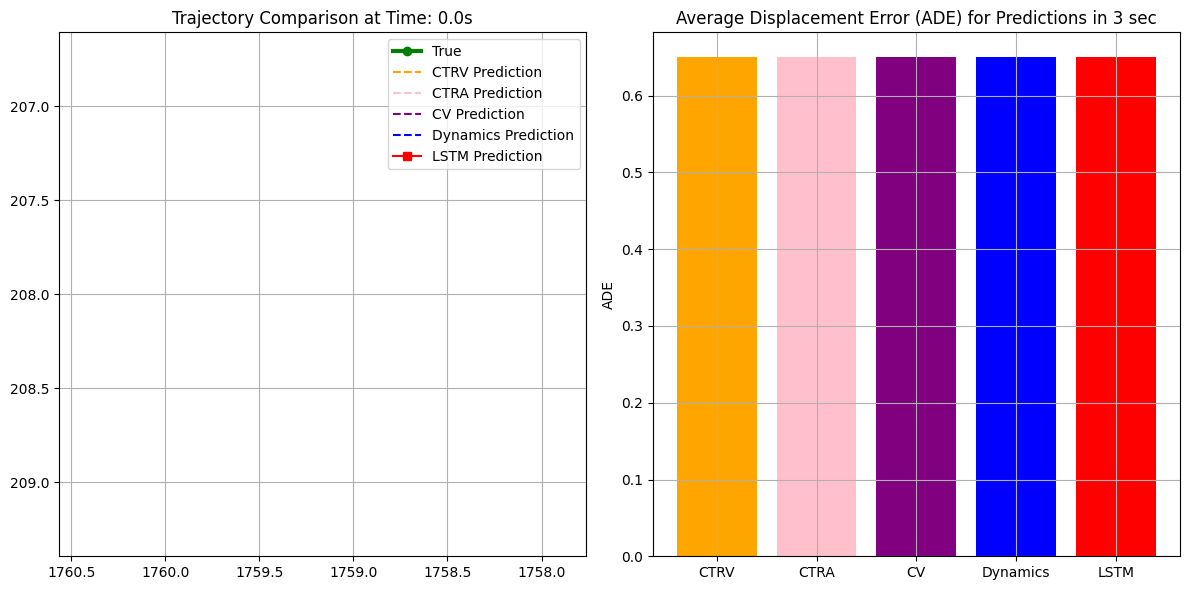

In [5]:
# 초기 Figure와 Subplot 설정
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.ion()  # Interactive mode on

# 시간 별 결과 플롯 ##
# Tkinter 설정
root = tk.Tk()
root.title("Trajectory Visualization")
root.geometry("300x100")

# 버튼 설정
btn_prev = tk.Button(root, text="Previous", command=prev_index)
btn_prev.pack(side=tk.LEFT, padx=5, pady=5)

btn_next = tk.Button(root, text="Next", command=next_index)
btn_next.pack(side=tk.LEFT, padx=5, pady=5)

btn_set_index = tk.Button(root, text="Set Index", command=set_index)
btn_set_index.pack(side=tk.LEFT, padx=5, pady=5)

# 초기 플롯
update_plot()  # 초기 플롯을 업데이트하여 화면에 나타나게 합니다.

# Tkinter main loop
root.mainloop()